# PART 1 - Recursive Solution

In [ ]:
import re
import unittest
import sys
from time import time

sys.setrecursionlimit(10000000)

In [ ]:
def timer_func(func):
    # This function shows the execution time of 
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.10f}s')
        return result
    return wrap_func

In [21]:
@timer_func
def give_change_1(string_input):
    coins = [
        0.01,
        0.02,
        0.05,
        0.10,
        0.20,
        0.50,
        1.00,
        2.00]
    
    coins = [round(coin, 2) for coin in coins]
    coins = sorted(coins,reverse=True)

    def recursive_combo(amount,current_coin=0,counter= 0):
        amount = round(amount,2)
        # terminating condition for recursion 1
        if amount == 0.:
            # check if counter is odd
            if counter % 2 == 1:
                return 1
            else:
                return 0

        # terminating condition for recursion 2
        if amount < 0:
            return 0

        # otherwise run below recursivley
        n_combos = 0
        
        # current coin index ensures no duplicate combinations
        for x in range(current_coin,len(coins)):
            if coins[x]> amount:
                continue
            # pass counter as function input
            n_combos += recursive_combo(amount - coins[x],x,counter+1)
        return n_combos
    
    # will only accept string in this pattern
    pattern = r'£\d+\-\d{0,2}'
    formatted_amount = bool(re.search(pattern, string_input))
    
    # parse string and run recursive function
    if formatted_amount:
        pattern = r'£(\d+)\-(\d{0,2})'
        pound = re.search(pattern,string_input).group(1)
        pence = re.search(pattern,string_input).group(2)
        if len(pence) == 1:
            pence = float(pence)*10/100
        elif len(pence) == 2:
            pence = float(pence)/100
        elif len(pence) ==0:
            pence = 0
        amount = float(pound)+float(pence)
        
        amount = round(amount,2)
        
        return recursive_combo(amount)
    
    #otherwise return false    
    else:
        return False

In [22]:
give_change = give_change_1
# unit tests for easily combinations to mentally calculate, did not run solution until all tests passed
class TestNotebook(unittest.TestCase):
    
    def test_add(self):
        self.assertEqual(give_change('£0-01'), 1, "Should be 1") #(1)
        self.assertEqual(give_change('£0-02'), 1, "Should be 2") #(2)
        self.assertEqual(give_change('£0-03'), 1, "Should be 1") #(1,1,1)
        self.assertEqual(give_change('£0-04'), 1, "Should be 1") #(1,1,2)
        self.assertEqual(give_change('£0-05'), 3, "Should be 3") #(1,1,1,1,1),(2,1,1,1),(2,2,1),(5)
        self.assertEqual(give_change('£0-06'), 2, "Should be 2") # (2,2,2,)(1,1,1,1,2)
        self.assertEqual(give_change('£0-07'), 3, "Should be 2") # (1,1,1,1,1,1,1)(5,1,1),(2,2,1,1,1)

unittest.main(argv=[''], verbosity=2, exit=False)

test_add (__main__.TestNotebook) ... 

Function 'give_change_1' executed in 0.0000000000s
Function 'give_change_1' executed in 0.0000000000s
Function 'give_change_1' executed in 0.0000000000s
Function 'give_change_1' executed in 0.0000000000s
Function 'give_change_1' executed in 0.0000000000s
Function 'give_change_1' executed in 0.0000000000s
Function 'give_change_1' executed in 0.0000000000s


ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [24]:
def give_me_change(change_list):
    for amount in change_list:
        print('{} gives {} odd unique combinations'.format(amount,str(give_change(amount))))

change_list = ['£0-50',
               '£2-',
               #'£10-', # 10 is too slow for the purly recursive function
               #'£100-'
              ]
give_me_change(change_list)

Function 'give_change_1' executed in 0.0059857368s
£0-50 gives 225 odd unique combinations
Function 'give_change_1' executed in 2.6738474369s
£2- gives 36840 odd unique combinations


# PART 1 - Recursive Solution w Memoization

In [25]:
@timer_func
def give_change_2(string_input):
    
    coins = [
        0.01,
        0.02,
        0.05,
        0.10,
        0.20,
        0.50,
        1.00,
        2.00
    ]
    
    coins = [round(coin, 2) for coin in coins]
    coins = sorted(coins,reverse=True)
    
    def recursive_combo(amount,coins,counter= 0,memo=dict()):

        #amount = round(amount,2)
        # terminating condition for recursion 1
        
        if amount == 0:
            # check if counter is odd
            if counter % 2 == 1:
                return 1
            else:
                return 0

        # terminating condition for recursion 2
        if amount < 0:
            return 0
        
        if (amount,len(coins)) in memo.keys():
            #print((amount,len(coins)),'in',memo)
            return memo[(amount,len(coins))]
        
        else:
            # otherwise run below recursivley
            total = 0

            # current coin index ensures no duplicate combinations
            for x in range(len(coins)):
                #print(x)
                coin = coins[x]
                #print(coin)
                if coin > amount:
                    #print(coin)
                    continue
                else:
                    # pass counter as function inputpyto
                    result = recursive_combo(round(amount - coin,2),coins[x:],counter+1,memo)
    
                    if result > 0:
                        total += result
            memo[(amount,len(coins))] = total
            #print(memo)
            return total
    
    # will only accept string in this pattern
    pattern = r'£\d+\-\d{0,2}'
    formatted_amount = bool(re.search(pattern, string_input))
    
    # parse string and run recursive function
    if formatted_amount:
        pattern = r'£(\d+)\-(\d{0,2})'
        pound = re.search(pattern,string_input).group(1)
        pence = re.search(pattern,string_input).group(2)
        if len(pence) == 1:
            pence = float(pence)*10/100
        elif len(pence) == 2:
            pence = float(pence)/100
        elif len(pence) ==0:
            pence = 0
        #print(pound,pence)
        amount = float(pound)+pence
        #print(amount)
        
        return recursive_combo(amount,coins)
    
    #otherwise return false    
    else:
        return False

In [26]:
give_change = give_change_2
unittest.main(argv=[''], verbosity=2, exit=False)

test_add (__main__.TestNotebook) ... 

Function 'give_change_2' executed in 0.0000000000s
Function 'give_change_2' executed in 0.0000000000s
Function 'give_change_2' executed in 0.0000000000s
Function 'give_change_2' executed in 0.0000000000s
Function 'give_change_2' executed in 0.0009970665s
£0-50 gives 418 odd unique combinations
Function 'give_change_2' executed in 0.0019950867s
£2- gives 71904 odd unique combinations


FAIL

FAIL: test_add (__main__.TestNotebook)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-22-05eadb496bea>", line 9, in test_add
    self.assertEqual(give_change('£0-04'), 1, "Should be 1") #(1,1,2)
AssertionError: 2 != 1 : Should be 1

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (failures=1)


In [28]:
change_list.append('£100-')
give_me_change(change_list) # need to fix

Function 'give_change_2' executed in 0.0009973049s
£0-50 gives 418 odd unique combinations
Function 'give_change_2' executed in 0.0029921532s
£2- gives 71904 odd unique combinations
Function 'give_change_2' executed in 0.0678529739s
£100- gives 781557351925 odd unique combinations


# PART 2 A

In [ ]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import DropCorrelatedFeatures,DropConstantFeatures, DropDuplicateFeatures

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score

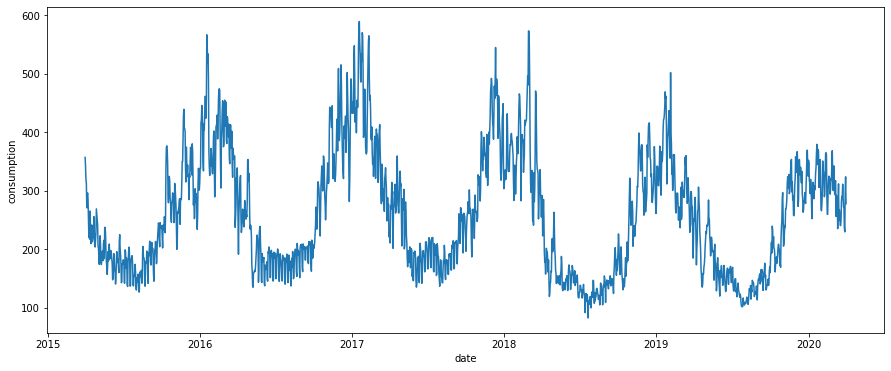

In [8]:
path = 'energy.DAT'
# desired test train split
test_split = 0.2

def prepare_time_series(path, visualize=False):
    # read file
    df = pd.read_table(path, sep=",",)
    
    # rename columns
    df = df.rename(columns=lambda x:x.lower())

    #convert string date to datetime object
    df['date'] = pd.to_datetime(df['date'])
    
    if visualize:
        plt.figure(figsize=(15,6))
        sns.lineplot(x='date',y='consumption',data=df)
        plt.show()
    
    return df

def test_train_split(test_split,df):
    # get number of records
    time_series_length = df.shape[0]

    # calculate index of split
    train_end_index = round(time_series_length*(1-test_split))

    # split to test and train set
    df_train = df.loc[:train_end_index]
    df_test = df.loc[train_end_index:] # hold out set

    del df

    x_train = df_train.drop(['consumption'],axis=1)
    y_train = df_train[['consumption']]

    x_test = df_test.drop(['consumption'],axis=1)
    y_test = df_test[['consumption']]
    
    return x_train, y_train, x_test, y_test

# prepare data
df = prepare_time_series(path,True)

x_train, y_train, x_test, y_test = test_train_split(test_split,df)

In [9]:
def select_best_model(x_train,y_train,load = True):
    
    if load:
        model = joblib.load('model.pkl') 
        return model
    dt_features_to_extract = [
                                'month',
                                'quarter',
                                'semester',
                                'year',
                                'week',
                                'day_of_week',
                                'day_of_month',
                                'day_of_year',
                                'weekend'
    ]

    pipeline = Pipeline([
        ('date_features', DatetimeFeatures(features_to_extract=dt_features_to_extract,drop_original=True)),
        ('standard_scaler',StandardScaler()),
        ('drop_constant',DropConstantFeatures()),
        ('drop_duplicate',DropDuplicateFeatures()),
        ('drop_correlated',DropCorrelatedFeatures()),
        ('nn',MLPRegressor(random_state=13)),
    ])

    param_grid = {
        'drop_constant__tol':[1,0.99,0.98,0.9],
        'drop_correlated__threshold':[0.7,0.8,0.9],
        'nn__activation':['relu','logistic'],
        'nn__learning_rate':['adaptive'],
        'nn__solver':['sgd'],
        'nn__batch_size':[20,40,60,80,100],
    }

    tscv = TimeSeriesSplit(n_splits=4)

    gridsearch_pipeline = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv = tscv,
        scoring='r2',
        #verbose=10,
        return_train_score=True
    )

    gridsearch_pipeline.fit(x_train,y_train)
    model = gridsearch_pipeline.best_estimator_
    joblib.dump('model.pkl')

    results = pd.DataFrame(gridsearch_pipeline.cv_results_)
    result = results.sort_values(['rank_test_score'])
    print(results)
    return model


model = select_best_model(x_train,y_train,True)

In [10]:
print(r2_score(y_test['consumption'],model.predict(x_test)))

0.7441403498253578


            consumption      type        pred
date                                         
2015-04-01      357.073  training  324.797752
2015-04-02      341.931  training  325.188468
2015-04-03      318.777  training  319.547784
2015-04-04      312.494  training  296.862174
2015-04-05      270.837  training  280.333444
            consumption        type        pred
date                                           
2021-03-27          NaN  prediction  262.730550
2021-03-28          NaN  prediction  260.978174
2021-03-29          NaN  prediction  299.031713
2021-03-30          NaN  prediction  287.690879
2021-03-31          NaN  prediction  279.411672


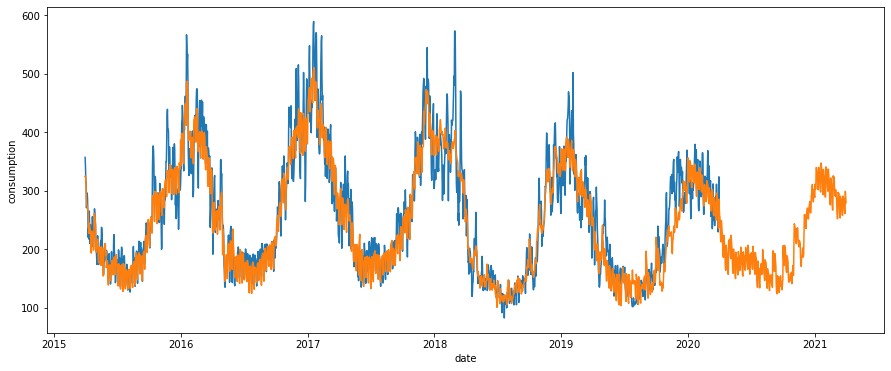

            consumption      type        pred
date                                         
2015-04-01      357.073  training  324.797752
2015-04-02      341.931  training  325.188468
2015-04-03      318.777  training  319.547784
2015-04-04      312.494  training  296.862174
2015-04-05      270.837  training  280.333444
            consumption        type        pred
date                                           
2022-03-27          NaN  prediction  273.661776
2022-03-28          NaN  prediction  313.811095
2022-03-29          NaN  prediction  310.510965
2022-03-30          NaN  prediction  305.093394
2022-03-31          NaN  prediction  288.669116


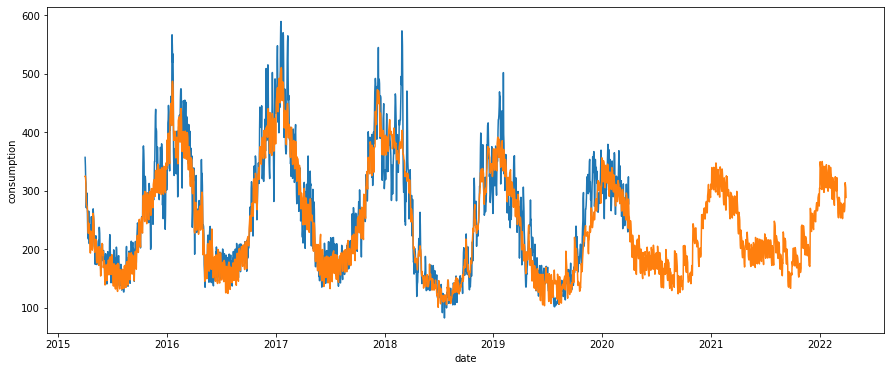

            consumption      type        pred
date                                         
2015-04-01      357.073  training  324.797752
2015-04-02      341.931  training  325.188468
2015-04-03      318.777  training  319.547784
2015-04-04      312.494  training  296.862174
2015-04-05      270.837  training  280.333444
            consumption        type        pred
date                                           
2023-03-27          NaN  prediction  317.946182
2023-03-28          NaN  prediction  318.218780
2023-03-29          NaN  prediction  316.503216
2023-03-30          NaN  prediction  295.936719
2023-03-31          NaN  prediction  286.386141


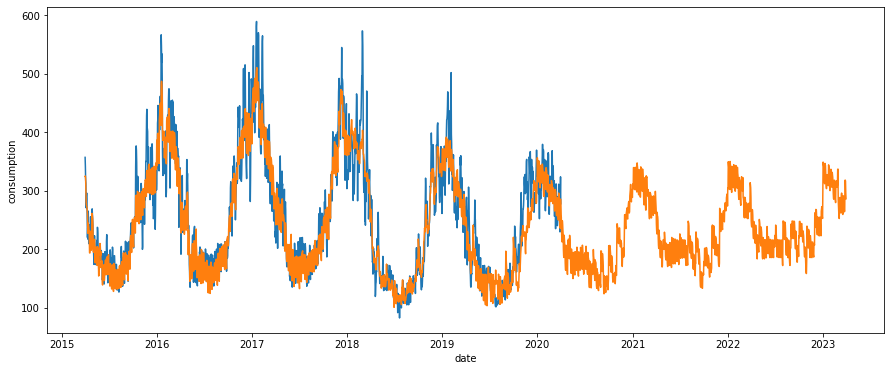

In [14]:
def create_predictions(df,model,prediction_horizon=365):
    
    df['type'] = 'training'  
    
    # get max date for start of predictions
    max_date = df['date'].max()

    # create prediction dataframe
    prediction_horizon+=1
    prediction_df = pd.DataFrame({'date':pd.date_range(start=max_date, periods=prediction_horizon)})

    #remove previous max record
    prediction_df = prediction_df.iloc[1:]
    prediction_df['type'] = 'prediction'
    
    
    df = pd.concat([df,prediction_df])

    df['pred'] = model.predict(df[['date']])
    
    df.set_index('date', inplace=True)
    print(df.head())
    print(df.tail())
    
    plt.figure(figsize=(15,6))
    sns.lineplot(x='date',y='consumption',data=df)
    sns.lineplot(x='date',y='pred',data=df)
    plt.show()
    
    return df



prediction_horizon_list = [
    365,
    365*2,
    365*3
]
for predition_horizon in prediction_horizon_list:
    pred_df = create_predictions(df,model,predition_horizon)


